## Chapter 6: Plotting with Advanced Features

In [1]:
%matplotlib inline

### Using Property Cycler

In [2]:
import matplotlib as mpl
from cycler import cycler

mpl.rc('axes', prop_cycle=cycler('color', ['r', 'orange', 'c', 'y']) +
                          cycler('hatch', ['x', 'xx-', '+O.', '*']))

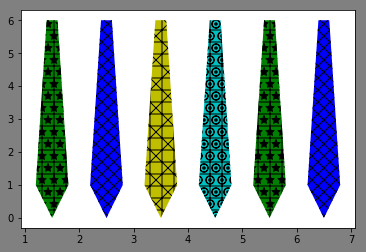

In [3]:
from cycler import cycler
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from IPython.core.display import display

fig = Figure()
FigureCanvas(fig)
fig.set(facecolor='grey', alpha=0.2, edgecolor='m')

ax = fig.add_subplot(111)

x = np.array([0.2, 0.4, 0.6, 0.8, 0.5])
y = [1, 6, 6, 1, 0]

custom_cycler = cycler('color', ['g', 'blue', 'y', 'c']) + \
                  cycler('hatch', ['+*', 'xx', '+x', '+O.'])

ax.set_prop_cycle(custom_cycler)
ax.fill(x+1, y)
ax.fill(x+2, y)
ax.fill(x+3, y)
ax.fill(x+4, y)
ax.fill(x+5, y)
ax.fill(x+6, y)

display(fig);

In [1]:
# Since we had updated rcParams in the preceding recipe, reset them back to original defaults
import matplotlib
matplotlib.rcdefaults() 

### Using Path Effects

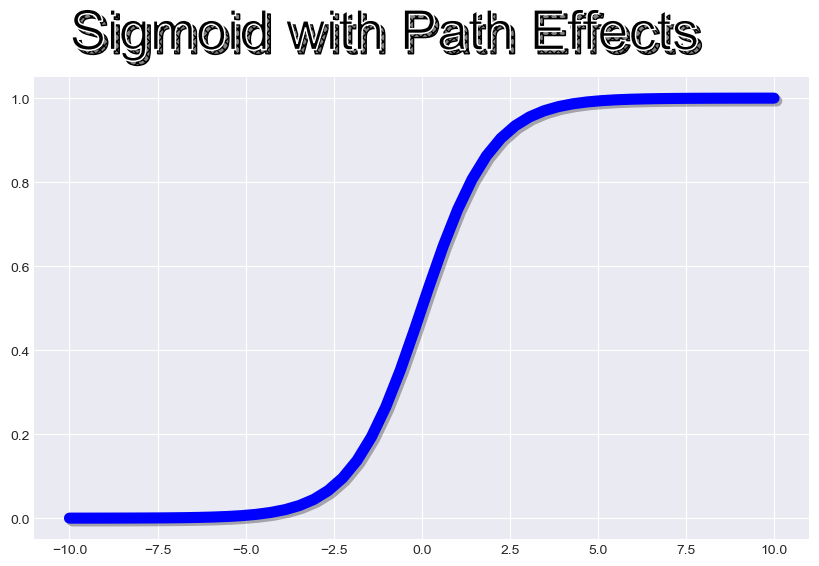

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

plt.style.use('seaborn-darkgrid')

plt.subplots(figsize=(10,6))
x = np.linspace(-10, 10, 50)
y = 1.0 / (1 + np.exp(-x))

t = plt.text(-10., 1.15, 'Sigmoid with Path Effects', fontsize=40, weight=50, va='center',
             path_effects=[PathPatchEffect(offset=(3, -3), hatch='xxxx', facecolor='gray'),
                           PathPatchEffect(edgecolor='white', linewidth=1.1, facecolor='black')])

plt.plot(x, y, linewidth=8, color='blue',
         path_effects=[SimpleLineShadow(), Normal()])

plt.show();

### Using Transforms

In [6]:
# To remove the effect of style used in the previous recipe, reset to original default style
import matplotlib
matplotlib.rcdefaults()

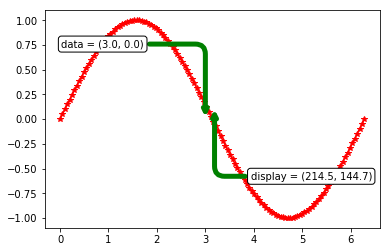

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
theta = np.linspace(0, 2*np.pi, 128)
y = np.sin(theta)
ax.plot(theta, y, 'r-*')
xdata, ydata = 3, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))
bbox = dict(boxstyle="round", fc="1.0")
arrowprops = dict(arrowstyle="->", color='green', lw=5, 
                  connectionstyle="angle,angleA=0,angleB=90,rad=10")
offset = 72
data = ax.annotate('data = (%.1f, %.1f)' % (xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
disp = ax.annotate('display = (%.1f, %.1f)' % (xdisplay, ydisplay),
                   (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
                   xycoords='figure pixels',
                   textcoords='offset points',
                   bbox=bbox, arrowprops=arrowprops)
plt.show();

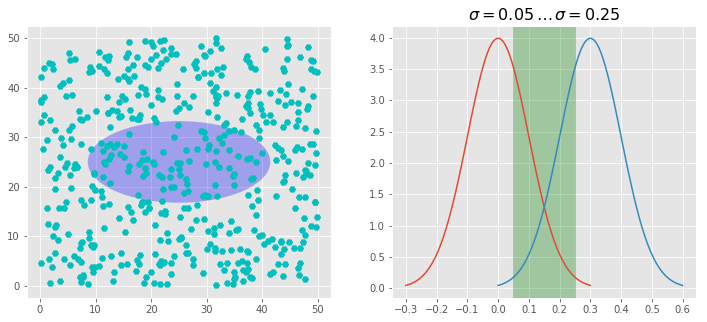

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.transforms as transforms
from scipy.stats import norm
from matplotlib.ticker import MultipleLocator

# Fixing random state for reproducibility
np.random.seed(19681211)
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,5))    # changed from (10,5) to (12,5) for 3.0
ax1 = fig.add_subplot(121)

x, y = 50*np.random.rand(2, 500)
ax1.plot(x, y, 'cH')  
# remove the comment to check if Ellipse remains at the same place, since it is on axes 
# co-ordinates ax.set_xlim(10,40)                

ellipse = patches.Ellipse((0.5, 0.5), 0.6, 0.3, transform=ax1.transAxes,
                      facecolor='blue', alpha=0.3)
ax1.add_patch(ellipse)

ax2 = fig.add_subplot(122)

mu1, mu2 = 0, 0.3
sigma = 0.1
x1 = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma, 100)
ax2.plot(x1, norm.pdf(x1, mu1, sigma))
x2 = np.linspace(mu2 - 3*sigma, mu2 + 3*sigma, 100)
ax2.plot(x2, norm.pdf(x2, mu2, sigma))

ax2.set_title(r'$\sigma=0.05 \/ \dots \/ \sigma=0.25$', fontsize=16)
ax2.xaxis.set_major_locator(MultipleLocator(0.1))

# transform y co-ordinates to axes co-ordinates and keep x co-ordinates in data co-ordinates
trans = transforms.blended_transform_factory(ax2.transData, ax2.transAxes)

# highlight the 0.05 to 0.25 stddev region with a rectangular box that shows x co-ordinates
# in data and y co-ordinates in axes
rect = patches.Rectangle((0.05, 0), width=0.2, height=1, transform=trans, 
                         color='green', alpha=0.3)

ax2.add_patch(rect)

plt.show();

### Taking Control of Axes Position

In [4]:
# To remove the effect of style used in the previous recipe, reset to original default style
import matplotlib
matplotlib.rcdefaults() 

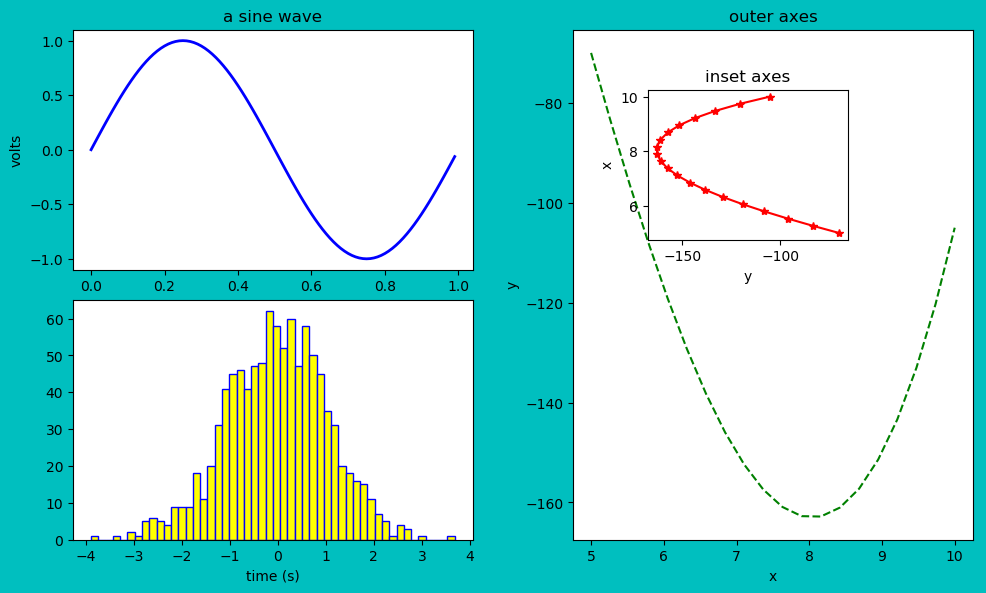

In [5]:
%matplotlib inline
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from IPython.core.display import display

# Fixing random state for reproducibility
np.random.seed(19681211)

fig = Figure(figsize=(10,6), dpi=100)
FigureCanvas(fig)
fig.set(facecolor='c', alpha=0.1, edgecolor='m')

ax1 = fig.add_axes([0.0, 0.55, 0.4, 0.4])
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

ax2 = fig.add_axes([0.0, 0.1, 0.4, 0.4])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='blue')
ax2.set_xlabel('time (s)')

x = np.linspace(5, 10, 20)
y = (x+5)*(x-7)*(x-9) - 150

ax3 = fig.add_axes([0.5, 0.1, 0.4, 0.85]) # main axes [left, bottom, width, height]
ax4 = fig.add_axes([0.575, 0.6, 0.2, 0.25]) # inset axes

# main figure
ax3.plot(x, y, 'g--')
ax3.set(xlabel='x', ylabel='y', title='outer axes')

# inset figure
ax4.plot(y, x, 'r-*')
ax4.set(xlabel='y', ylabel='x', title='inset axes')

display(fig);

### GridSpec for Figure Layout

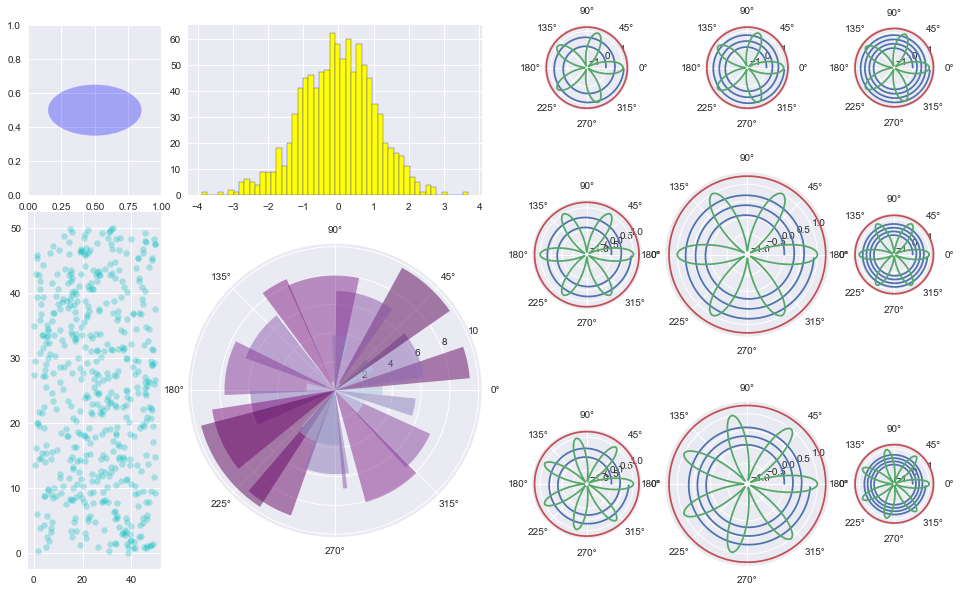

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec

# Fixing random state for reproducibility
np.random.seed(19681211)

plt.style.use('seaborn')

fig = plt.figure(figsize=(14,10))
gs1 = GridSpec(ncols=3, nrows=3, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
ax1 = fig.add_subplot(gs1[0, 0])
ellipse = patches.Ellipse((0.5, 0.5), 0.7, 0.3, transform=ax1.transAxes,
                      facecolor='blue', alpha=0.3)
ax1.add_patch(ellipse)

ax2 = fig.add_subplot(gs1[0, 1:])
ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='blue')

ax3 = fig.add_subplot(gs1[1:, 0])
x, y = 50*np.random.rand(2, 500)
ax3.plot(x, y, 'cH', alpha=0.3)  # plot some data in data coordinates

ax4 = fig.add_subplot(gs1[1:, 1:], projection='polar')
N = 30
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

bars = ax4.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.BuPu(r / 10.))
    bar.set_alpha(0.5)
    
widths = [2, 3, 1.5]
heights = [1, 3, 2]
gs2 = GridSpec(ncols=3, nrows=3, left=0.55, right=0.95, wspace=0.2, hspace=0.1, 
               width_ratios=widths, height_ratios=heights)
theta = np.arange(0., 2., 1./180.)*np.pi

for row in range(3):
    for col in range(3):
        ax = fig.add_subplot(gs2[row, col], projection='polar')
        ax.plot((col+2)*theta, theta/(row+6))
        ax.plot(theta, np.cos((row+5)*theta))
        ax.plot(theta, [1.25]*len(theta))
plt.show();

#### plt.subplots with GridSpec width and height ratios

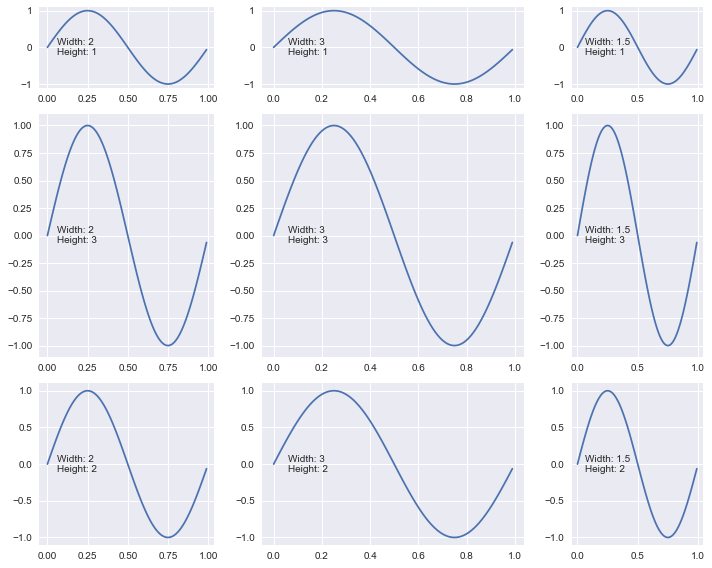

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

widths = [2, 3, 1.5]
heights = [1, 3, 2]
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
### Passing keyword specs to plt
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10,8), gridspec_kw=gs_kw)
for r, row in enumerate(axes):
    for c, ax in enumerate(row):
        ax.plot(t, s)
        label = 'Width: {}\nHeight: {}'.format(widths[c], heights[r])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')
fig.tight_layout()
plt.show();

### GridSpec Alignment at top and bottom

C:\Anaconda3\envs\dloct2018\lib\site-packages\matplotlib\gridspec.py:335: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


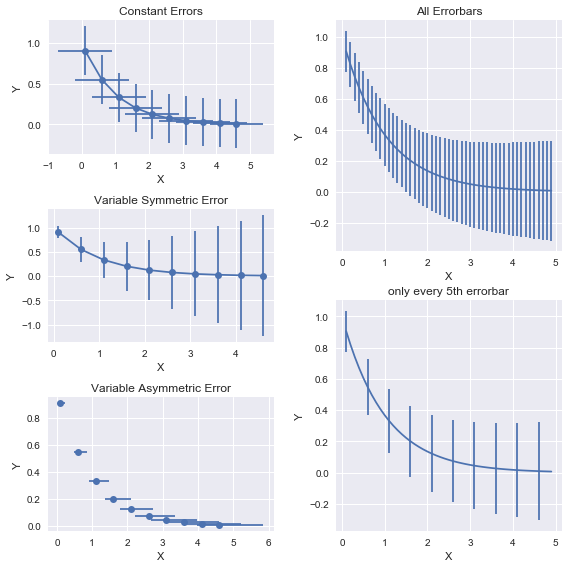

In [8]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,8))
plt.style.use('seaborn-deep')

def plot_errorbar(axs, x, y, xerr=None, yerr=None, errevery=1, title=None, xlabel=None, 
                  ylabel=None, fmt=None):
    ax = fig.add_subplot(axs)
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, errorevery=errevery, fmt=fmt)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

gs1 = GridSpec(3, 1)
# example data
x = np.arange(0.1, 5, 0.5)
y = np.exp(-x)
plot_errorbar(gs1[0], x, y, xerr=0.8, yerr=0.3, title='Constant Errors', xlabel='X', 
              ylabel='Y', fmt='-o')

# example error bar values that vary with x-position
error = 0.1 + 0.25 * x
plot_errorbar(gs1[1], x, y, yerr=error, title='Variable Symmetric Error', xlabel='X', 
              ylabel='Y', fmt='-o')

lower_error = 0.5 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]
plot_errorbar(gs1[2], x, y, xerr=asymmetric_error, title='Variable Asymmetric Error', 
              xlabel='X', ylabel='Y', fmt='o')

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

x = np.arange(0.1, 5, 0.1)
y = np.exp(-x)
gs2 = GridSpec(2, 1)
# example variable error bar values
yerr = 0.1 + 0.1 * np.sqrt(x)
plot_errorbar(gs2[0], x, y, yerr=yerr, title='All Errorbars', xlabel='X', 
              ylabel='Y', fmt='-')
plot_errorbar(gs2[1], x, y, yerr=yerr, errevery=5, title='only every 5th errorbar', 
              xlabel='X', ylabel='Y', fmt='-')

gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

# If two grids are not aligned on top or bottom, try to match
top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)

plt.show()

### Constrained Layout, Beta in 2.2

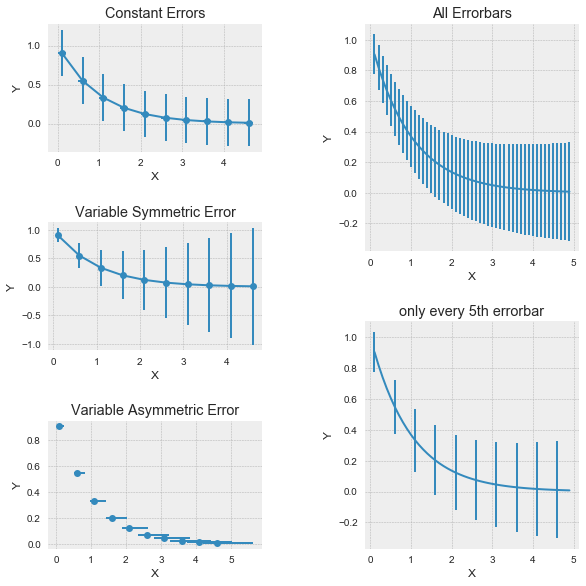

In [9]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,8), constrained_layout=True)
plt.style.use('bmh')

def plot_errorbar(ax, x, y, xerr=None, yerr=None, errevery=1, title=None, xlabel=None, 
                  ylabel=None, fmt=None):
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, errorevery=errevery, fmt=fmt)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

x = np.arange(0.1, 5, 0.5)
y = np.exp(-x)

gs = GridSpec(6, 2, figure=fig)
ax = fig.add_subplot(gs[0:2, 0])
plot_errorbar(ax, x, y, xerr=0.1, yerr=0.3, title='Constant Errors', xlabel='X', 
              ylabel='Y', fmt='-o')

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x
ax = fig.add_subplot(gs[2:4, 0])
plot_errorbar(ax, x, y, yerr=error, title='Variable Symmetric Error', xlabel='X', 
              ylabel='Y', fmt='-o')

lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]
ax = fig.add_subplot(gs[4:, 0])
plot_errorbar(ax, x, y, xerr=asymmetric_error, title='Variable Asymmetric Error', 
              xlabel='X', ylabel='Y', fmt='o')

x = np.arange(0.1, 5, 0.1)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.1 * np.sqrt(x)
ax = fig.add_subplot(gs[:3, 1])
plot_errorbar(ax, x, y, yerr=yerr, title='All Errorbars', xlabel='X', ylabel='Y', fmt='-')
ax = fig.add_subplot(gs[3:, 1])
plot_errorbar(ax, x, y, yerr=yerr, errevery=5, title='only every 5th errorbar', 
              xlabel='X', ylabel='Y', fmt='-')

fig.set_constrained_layout_pads(w_pad=2./72., h_pad=2./72., hspace=0.2, wspace=0.2)

plt.show()

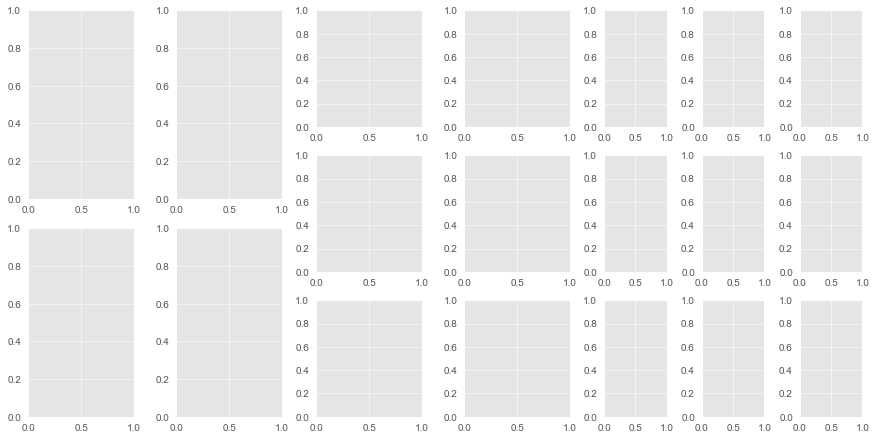

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

plt.style.use('ggplot')
fig = plt.figure(figsize=(12,6), constrained_layout=True)
gs0 = GridSpec(1, 3, figure=fig)

gs00 = GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[0])
gs01 = GridSpecFromSubplotSpec(3, 2, subplot_spec=gs0[1])
gs02 = GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[2])

for a in range(2):
    for b in range(2):
        fig.add_subplot(gs00[a, b])
for a in range(3):
    for b in range(2):
        fig.add_subplot(gs01[a, b])
for a in range(3):
    for b in range(3):
        fig.add_subplot(gs02[a, b])

fig.set_constrained_layout_pads()
plt.show()

### Origin and Extent

In [11]:
# To remove the effect of style used in the previous recipe, reset to original default style
import matplotlib
matplotlib.rcdefaults() 

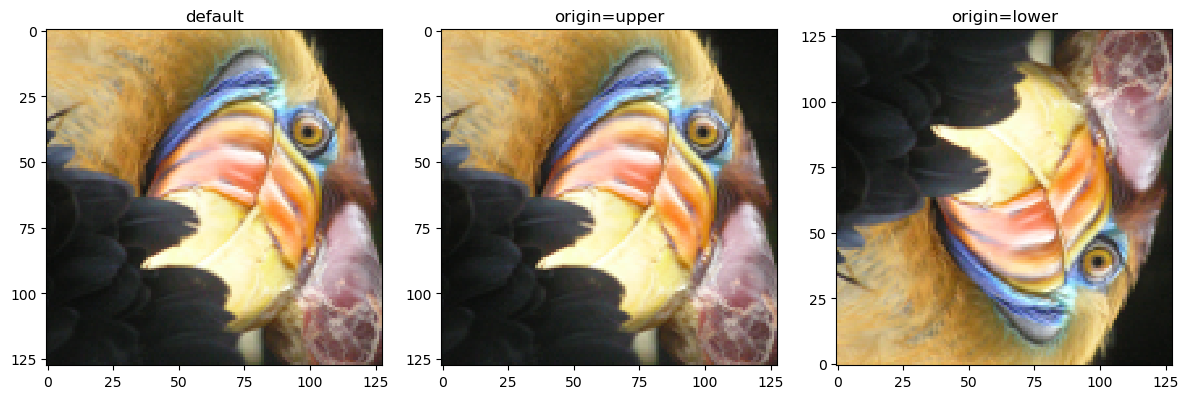

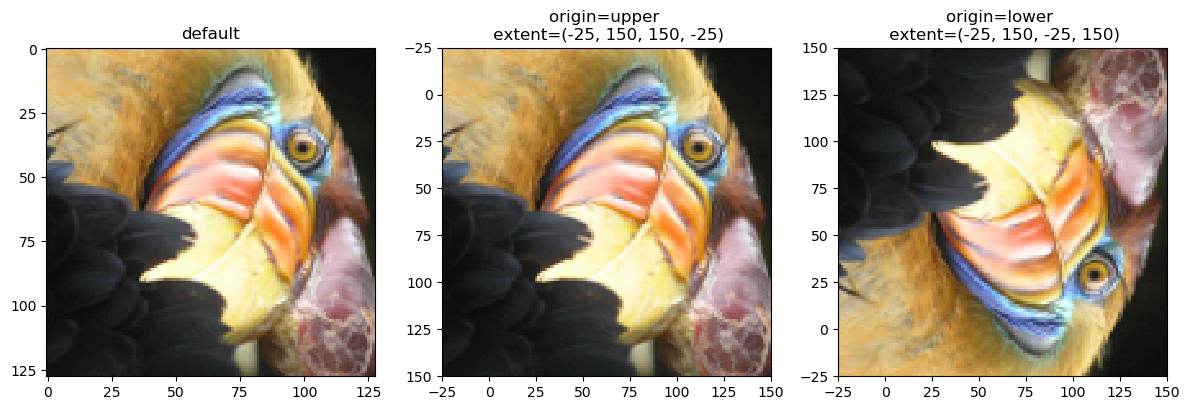

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

img = plt.imread('bird_small.png')
def plot(ax, origin, extent, title):
    ax.imshow(img, origin=origin, extent=extent)
    ax.xaxis.set_major_locator(MultipleLocator(25))
    ax.yaxis.set_major_locator(MultipleLocator(25))
    ax.set_title(title)
    
fig1, axs1 = plt.subplots(1, 3, figsize=(12,6))
plot(axs1[0], None, None, title='default')
plot(axs1[1], 'upper', None, title='origin=upper')
plot(axs1[2], 'lower', None, title='origin=lower')
plt.tight_layout()

fig2, axs2 = plt.subplots(1, 3, figsize=(12,6))
plot(axs2[0], None, None, title='default')
plot(axs2[1], 'upper', (-25, 150, 150, -25), title='origin=upper \n extent=(-25, 150, 150, -25)')
plot(axs2[2], 'lower', (-25, 150, -25, 150), title='origin=lower \n extent=(-25, 150, -25, 150)')

plt.tight_layout()
plt.show()

#### Geographical plotting

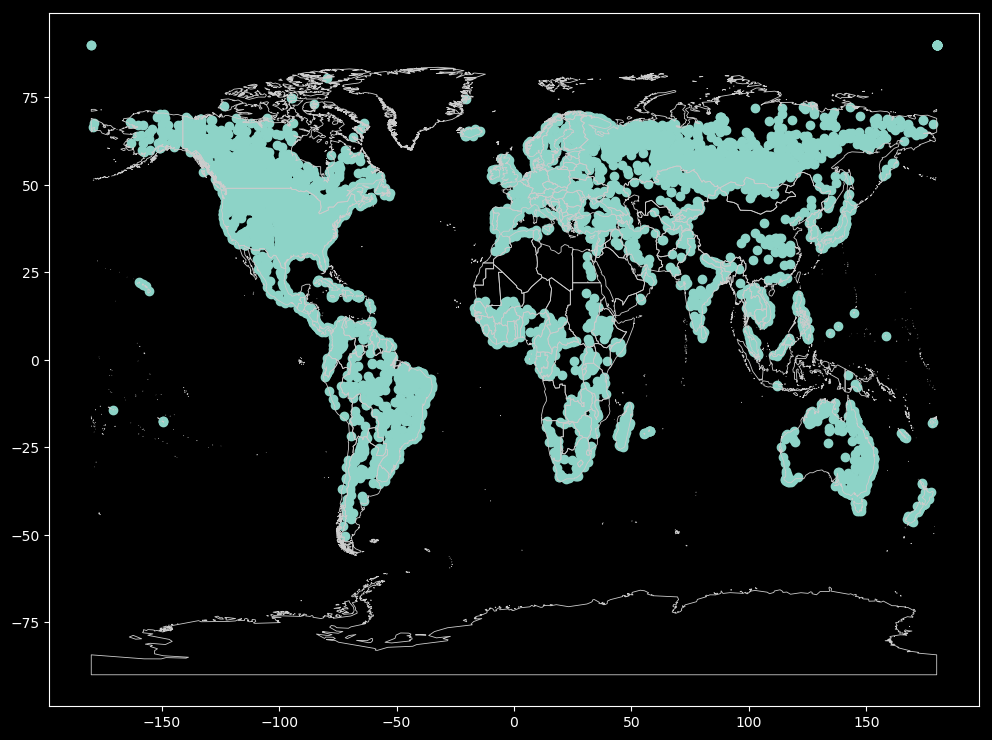

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

plt.style.use('dark_background')
# Downloaded from the Climate Change Knowledge portal by the World Bank Group
# Source URL: http://climate4development.worldbank.org/open/#precipitation

# Locations where Global Weather Stations are that monitor weather changes across the globe
# Though we use .shp file here, it requires corresponding .shx, .sbx etc. all the files part of 
# zip file should be unzipped and placed in working directory. Otherwise, this code fails.
world_wc = gpd.read_file('GRDC.shp')
world_wc.head()

# Downloaded from thematicmapping.org
# Source URL http://thematicmapping.org/downloads/world_borders.php
world_borders = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.3.shp')
world_borders.head()

# Initialize an figure and an axes as the canvas
fig,ax = plt.subplots(figsize=(12,9))

# Plot Global Weather Change data on ax
world_wc.plot(ax=ax)

# Draw the simple worldmap borders
world_borders.boundary.plot(ax=ax,color='#cccccc',linewidth=0.6)

plt.show()